# Simulator CartPole (Double PID)

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

from components.systems.inverted_pendulum_system import InvertedPendulumSystem
from components.environments.pendulum_environment import PendulumEnvironment
from components.controllers.pid_controller_angle import PIDControllerAngle
from components.controllers.pid_controller_cart import PIDControllerCart

In [3]:
def plot_cartPole(hist: dict, 
                  hist0: dict, 
                  level_sp: float, 
                  goal_treshold: dict, 
                  fig_save_name=None,
                  plot_PID0=True):
    
    cfg_figsize = (10, 4)
    cfg_title_size = 20
    cfg_axis_label_size = 18
    cfg_axis_tick_size = 14
    cfg_title_pad = 10
    cfg_axis_label_pad = 10
    cfg_legend_size = 'x-large'
    
    time_raw0              = np.array(hist0['time'])
    cart_position_raw0     = np.array(hist0['cart_position'])
    cart_velocity_raw0     = np.array(hist0['cart_velocity'])
    pendulum_angle_raw0    = np.array(hist0['pendulum_angle'])
    pendulum_vel_raw0      = np.array(hist0['pendulum_velocity'])
    control_raw0           = np.array(hist0['control'])

    time0              = time_raw0[~np.isnan(time_raw0)]
    cart_position0     = cart_position_raw0[~np.isnan(cart_position_raw0)]
    cart_velocity0     = cart_velocity_raw0[~np.isnan(cart_velocity_raw0)]
    pendulum_angle0    = pendulum_angle_raw0[~np.isnan(pendulum_angle_raw0)]
    pendulum_vel0      = pendulum_vel_raw0[~np.isnan(pendulum_vel_raw0)]
    control0           = control_raw0[~np.isnan(control_raw0)]

    t_adjust0 = len(time0)
    
    time_raw              = np.array(hist['time'])
    cart_position_raw     = np.array(hist['cart_position'])
    cart_velocity_raw     = np.array(hist['cart_velocity'])
    pendulum_angle_raw    = np.array(hist['pendulum_angle'])
    pendulum_vel_raw      = np.array(hist['pendulum_velocity'])
    control_raw           = np.array(hist['control'])

    time              = time_raw[~np.isnan(time_raw)]
    cart_position     = cart_position_raw[~np.isnan(cart_position_raw)]
    cart_velocity     = cart_velocity_raw[~np.isnan(cart_velocity_raw)]
    pendulum_angle    = pendulum_angle_raw[~np.isnan(pendulum_angle_raw)]
    pendulum_vel      = pendulum_vel_raw[~np.isnan(pendulum_vel_raw)]
    control           = control_raw[~np.isnan(control_raw)]
    
    t_adjust = len(time)
    cartsp = round(float((goal_treshold['cart_position_threshold'][0] + goal_treshold['cart_position_threshold'][1])/2),1)

    # Logic Plot
    # Fig 1: Pendulum angle vs Time
    fig1, ax1 = plt.subplots(1, 1, figsize=cfg_figsize)
    if plot_PID0 == True:
        ax1.plot(time0[:t_adjust0], pendulum_angle0[:t_adjust0], label='Initial PID', color='b', alpha=0.5)
    ax1.plot(time[:t_adjust], pendulum_angle[:t_adjust], label='Final PID', color='b')
    ax1.axhline(y=level_sp+goal_treshold['angle_threshold'], color='r', linestyle='--', alpha=0.5)
    ax1.axhline(y=level_sp-goal_treshold['angle_threshold'], color='r', linestyle='--', label='Setpoint', alpha=0.5)
    ax1.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax1.set_ylabel('Pendulum angle [rad]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax1.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax1.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax1.set_title('Pendulum angle vs Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax1.legend(fontsize=cfg_legend_size)
    ax1.grid(True)
    plt.tight_layout()
    if fig_save_name is not None:
        fig1.savefig(f"{fig_save_name}_cartsp{cartsp}_angle.png", bbox_inches='tight')
    
    # Fig 2: Pendulum velocity vs Time
    fig2, ax2 = plt.subplots(1, 1, figsize=cfg_figsize)
    if plot_PID0 == True:
        ax2.plot(time0[:t_adjust0], pendulum_vel0[:t_adjust0], label='Initial PID', color='b', alpha=0.5)
    ax2.plot(time[:t_adjust], pendulum_vel[:t_adjust], label='Final PID', color='b')
    ax2.axhline(y=level_sp+goal_treshold['angle_vel_threshold'], color='r', linestyle='--', alpha=0.5)
    ax2.axhline(y=level_sp-goal_treshold['angle_vel_threshold'], color='r', linestyle='--', label='Setpoint', alpha=0.5)
    ax2.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax2.set_ylabel('Pendulum velocity [rad/s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax2.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax2.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax2.set_title('Pendulum velocity vs Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax2.legend(fontsize=cfg_legend_size)
    ax2.grid(True)
    plt.tight_layout()
    if fig_save_name is not None:
        fig2.savefig(f"{fig_save_name}_cartsp{cartsp}_angle_vel.png", bbox_inches='tight')
    
    # Fig 3: Cart position vs Time
    fig3, ax3 = plt.subplots(1, 1, figsize=cfg_figsize)
    if plot_PID0 == True:
        ax3.plot(time0[:t_adjust0], cart_position0[:t_adjust0], label='Initial PID', color='g', alpha=0.5)
    ax3.plot(time[:t_adjust], cart_position[:t_adjust], label='Final PID', color='g')
    ax3.axhline(y=goal_treshold['cart_position_threshold'][1], color='r', linestyle='--', alpha=0.5)
    ax3.axhline(y=goal_treshold['cart_position_threshold'][0], color='r', linestyle='--', label='Setpoint', alpha=0.5)
    ax3.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax3.set_ylabel('Cart position [m]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax3.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax3.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax3.set_title('Cart position vs Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax3.legend(fontsize=cfg_legend_size)
    ax3.grid(True)
    plt.tight_layout()
    if fig_save_name is not None:
        fig3.savefig(f"{fig_save_name}_cartsp{cartsp}_cart_pos.png", bbox_inches='tight')
    
    # Fig 4: Cart velocity vs Time
    fig4, ax4 = plt.subplots(1, 1, figsize=cfg_figsize)
    if plot_PID0 == True:
        ax4.plot(time0[:t_adjust0], cart_velocity0[:t_adjust0], label='Initial PID', color='g', alpha=0.5)
    ax4.plot(time[:t_adjust], cart_velocity[:t_adjust], label='Final PID', color='g')
    ax4.axhline(y=goal_treshold['cart_velocity_threshold'][1], color='r', linestyle='--', alpha=0.5)
    ax4.axhline(y=goal_treshold['cart_velocity_threshold'][0], color='r', linestyle='--', label='Setpoint', alpha=0.5)
    ax4.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax4.set_ylabel('Cart velocity [m/s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax4.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax4.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax4.set_title('Cart velocity vs Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax4.legend(fontsize=cfg_legend_size)
    ax4.grid(True)
    plt.tight_layout()
    if fig_save_name is not None:
        fig4.savefig(f"{fig_save_name}_cartsp{cartsp}_cart_vel.png", bbox_inches='tight')
    
    # Fig 5: Control action vs Time
    fig5, ax5 = plt.subplots(1, 1, figsize=cfg_figsize)
    if plot_PID0 == True:
        ax5.plot(time0[:t_adjust0], control0[:t_adjust0], label='Initial PID', color='orange', alpha=0.5)
    ax5.plot(time[:t_adjust], control[:t_adjust], label='Final PID', color='orange')
    ax5.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax5.set_ylabel('Control action [%]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax5.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax5.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax5.set_title('Control action vs. Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax5.legend(fontsize=cfg_legend_size)
    ax5.grid(True)
    plt.tight_layout()
    if fig_save_name is not None:
        fig5.savefig(f"{fig_save_name}_cartsp{cartsp}_control.png", bbox_inches='tight')
    
    plt.show()

In [5]:
class NoOpAgent:
    def reset_agent(self): pass
    def should_episode_terminate_early(self): return False

class BasicStabilityCalculator:
    def calculate_instantaneous_stability(self, state_dict): 
        return 1.0
    # Si usas "stability_measure_based" en la recompensa:
    def calculate_stability_based_reward(self, state_dict): 
        return 0.0
    def update_reference_stats(self, episode_metrics_log_dict, episode_idx_completed):
        pass
class InstantaneousRewardCalculator:
    def reset(self): pass
    def calculate(self, state_dict, action_a, next_state_dict, current_episode_time_sec, dt_sec, goal_reached_in_step): pass

In [61]:
def prepare_config_for_bank_test(config: dict) -> dict:
    cfg = copy.deepcopy(config)
    # Rutas mínimas usadas por Environment y Reward
    env_cfg = cfg.setdefault('environment', {})
    sim_cfg = env_cfg.setdefault('simulation', {})
    ctrl_cfg = env_cfg.setdefault('controller', {})

    # dt requerido por el Environment
    assert 'dt_sec' in sim_cfg and float(sim_cfg['dt_sec']) > 0, "Falta environment.simulation.dt_sec"

    # Activar actuador global + límites
    ctrl_cfg.setdefault('mixing_policy', 'sum')          # 'sum' con reparto proporcional del overage
    ctrl_cfg.setdefault('global_actuator', False)
    ctrl_cfg.setdefault('global_actuator_limits', [-1.0, 1.0])

    return cfg

def build_controllers(pid_angle_cfg: dict, pid_cart_cfg: dict, dt: float):
    # Fuerza flags locales desactivados (solo actuador global)
    pa = {**pid_angle_cfg}
    pc = {**pid_cart_cfg}

    ctrl_angle = PIDControllerAngle(
        kp=pa['kp'], ki=pa['ki'], kd=pa['kd'],
        setpoint=pa['setpoint'], dt_sec=dt,
        name_objective_var=pa['name_objective_var'],
        actuator_limits=pa.get('actuator_limits', [-1.0, 1.0]),
        clipping_output=pa['clipping_output'],
        normalize_output=pa['normalize_output'],
        #error_is_setpoint_minus_pv=pa.get('error_is_setpoint_minus_pv', False),
        anti_windup=pa.get('anti_windup', {'enabled': True, 'method':'back_calculation','back_calculation_beta':0.1})
    )
    ctrl_cart = PIDControllerCart(
        kp=pc['kp'], ki=pc['ki'], kd=pc['kd'],
        setpoint=pc['setpoint'], dt_sec=dt,
        name_objective_var=pc['name_objective_var'],
        actuator_limits=pc.get('actuator_limits', [-1.0, 1.0]),
        clipping_output=pc['clipping_output'],
        normalize_output=pc['normalize_output'],
        #error_is_setpoint_minus_pv=pc.get('error_is_setpoint_minus_pv', False),
        anti_windup=pc.get('anti_windup', {'enabled': True, 'method':'back_calculation','back_calculation_beta':0.1})
    )
    return {'angle': ctrl_angle, 'cart': ctrl_cart}

In [63]:
def run_single_episode_env(initial_conditions: dict,
                           system_params: dict,
                           pid_angle_cfg: dict,
                           pid_cart_cfg: dict,
                           full_config: dict):
    # 1) Preparar config y dependencias
    config = prepare_config_for_bank_test(full_config)
    dt = float(config['environment']['simulation']['dt_sec'])
    total_time = float(config['environment']['simulation']['episode_time_sec'])

    system = InvertedPendulumSystem(**system_params)
    controllers = build_controllers(pid_angle_cfg, pid_cart_cfg, dt)
    stability_calc = BasicStabilityCalculator()
    reward_calc = InstantaneousRewardCalculator()

    env = PendulumEnvironment(system=system,
                              controllers=controllers,
                              agent=NoOpAgent(),
                              reward_function=reward_calc,
                              stability_calculator=stability_calc,
                              config=config)

    state = env.reset(initial_conditions)

    # 2) Buffers de histórico
    steps = int(total_time / dt)
    hist = {
        'time':             np.full(steps, np.nan),
        'cart_position':    np.full(steps, np.nan),
        'cart_velocity':    np.full(steps, np.nan),
        'pendulum_angle':   np.full(steps, np.nan),
        'pendulum_velocity':np.full(steps, np.nan),
        'control':          np.full(steps, np.nan),  # acción final aplicada (post-mix)
        # Si tu PID expone tracking interno, puedes leerlo del propio controlador para debug
        # 'u_angle_eff':   np.full(steps, np.nan),
        # 'u_cart_eff':    np.full(steps, np.nan),
    }

    t = 0.0
    for i in range(steps):
        next_state, reward, stab, u_applied = env.step()  # u_applied ya es saturado globalmente
        hist['time'][i]              = t
        hist['cart_position'][i]     = next_state[0]
        hist['cart_velocity'][i]     = next_state[1]
        hist['pendulum_angle'][i]    = next_state[2]
        hist['pendulum_velocity'][i] = next_state[3]
        hist['control'][i]           = u_applied

        # Terminar si se cumple criterio de parada del entorno/config
        limit_exceeded, goal_reached, agent_stop = env.check_termination()
        if limit_exceeded or goal_reached:
            # Trunca arrays para que queden del largo real
            for k in hist:
                hist[k] = hist[k][:i+1]
            break

        t += dt
    return hist

In [71]:
# =========================
# CONFIG mínima del Environment
# =========================
# - dt del episodio de prueba
# - Mezcla global: 'sum' con actuador global y límites físicos
# - Criterios básicos de terminación (si tu Environment los usa)
config = {
    'environment': {
        'simulation': {
            'dt_sec': 0.001,
            'episode_time_sec': 5.0,
            'enable_cart_pos_limit': True,
            'cart_pos_limit_m': 5.0,
            'enable_angle_limit': True,
            'pendulum_angle_limit_rad': 1.57
        },
        'controller': {
            'mixing_policy': 'sum',              # suma + recorte + reparto proporcional
            'global_actuator': True,
            'global_actuator_limits': [-1.0, 1.0]
        },
        'termination': {
            'enable_limits': True,
            'cart_position_limit': 5.0,            # m
            'pendulum_angle_limit': 3.14,        # rad
            'max_time_sec': 5.0
        }
    }
}
# =========================
# Inicialización del sistema
# =========================
init_cond = {
    'cart_position': 0.0,
    'cart_velocity': 0.0,
    'pendulum_angle': 0.157,       # ~9.0°
    'pendulum_velocity': 0.0
}

system_cfg = {
    'mass_cart_kg': 5.0,
    'mass_pendulum_kg': 1.0,
    'l': 1.0,
    'g': 9.81,
    'cart_friction_coef': 0.0,
    'pivot_friction_coef': 0.0,
    'max_torque_nm': 6.0,
    'gear_ratio': 1.0,
    'pinion_radius_m': 0.05
}

# Umbrales visuales/meta (si tu plot los usa)
goal_treshold = {
    'angle_threshold': 0.005,                   # rad
    'angle_vel_threshold': 0.05,                # rad/s
    'cart_position_threshold': [-0.05, 0.05],   # m
    'cart_velocity_threshold': [-0.05, 0.05]    # m/s
}

# =========================
# PIDs BASELINE (hist0)
# =========================
# PID ángulo con ganancias iniciales
pid_angle_base = {
    'kp': 1.0, 'ki': 1.0, 'kd': 1.0,
    'setpoint': 0.0,
    'name_objective_var': 'pendulum_angle',
    'actuator_limits': [-1.0, 1.0],
    'clipping_output': True,
    'normalize_output': False,
    'error_is_setpoint_minus_pv': False,
    'anti_windup': {
        'enabled': False,
        'method': 'conditional',
        'back_calculation_beta': 0.1
    }
}
# PID carro con ganancias iniciales
pid_cart_base = {
    'kp': 1.0, 'ki': 1.0, 'kd': 1.0,
    'setpoint': 0.0,
    'name_objective_var': 'cart_position',
    'actuator_limits': [-1.0, 1.0],
    'clipping_output': True,
    'normalize_output': False,
    'error_is_setpoint_minus_pv': False,
    'anti_windup': {
        'enabled': False,
        'method': 'conditional',
        'back_calculation_beta': 0.1
    }
}
# =========================
# PIDs TUNED (hist)
# =========================
# PID ángulo con ganancias sintonizadas
pid_angle_cfg = {
    'kp': 5.0, 'ki': 5.0, 'kd': 2.1,
    'setpoint': 0.0,
    'name_objective_var': 'pendulum_angle',
    'actuator_limits': [-1.0, 1.0],
    'clipping_output': True,
    'normalize_output': False,
    'error_is_setpoint_minus_pv': False,
    'anti_windup': {
        'enabled': False,
        'method': 'conditional',
        'back_calculation_beta': 0.1
    }
}
# PID carro con ganancias sintonizadas
pid_cart_cfg = {
    'kp': 0.8, 'ki': 0.0, 'kd': 0.6,
    'setpoint': 0.0,
    'name_objective_var': 'cart_position',
    'actuator_limits': [-1.0, 1.0],
    'clipping_output': True,
    'normalize_output': False,
    'error_is_setpoint_minus_pv': False,
    'anti_windup': {
        'enabled': False,
        'method': 'conditional',
        'back_calculation_beta': 0.1
    }
}

In [73]:
# hist0: baseline (ganancias iniciales)
hist0 = run_single_episode_env(
    initial_conditions=init_cond,
    system_params=system_cfg,
    pid_angle_cfg=pid_angle_base,
    pid_cart_cfg=pid_cart_base,
    full_config=config,
)

# hist: tuned (ganancias sintonizadas)
hist = run_single_episode_env(
    initial_conditions=init_cond,
    system_params=system_cfg,
    pid_angle_cfg=pid_angle_cfg,
    pid_cart_cfg=pid_cart_cfg,
    full_config=config,
)

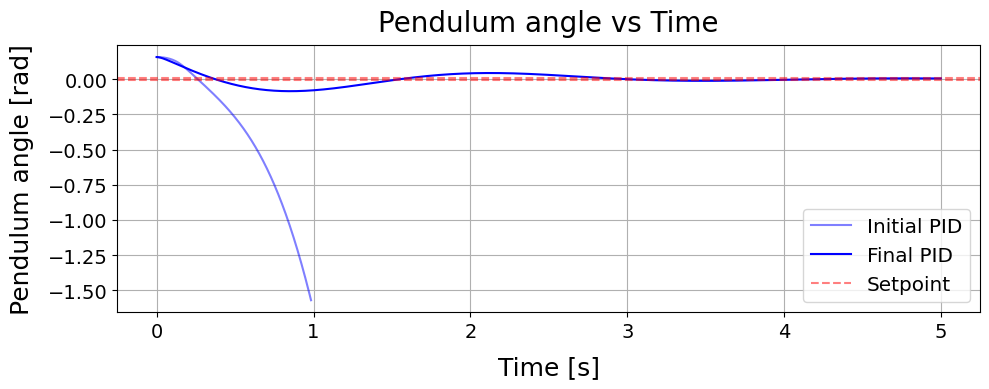

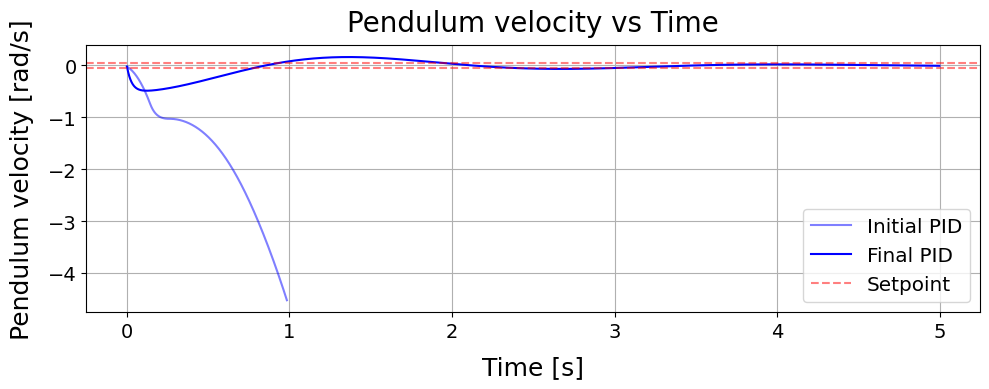

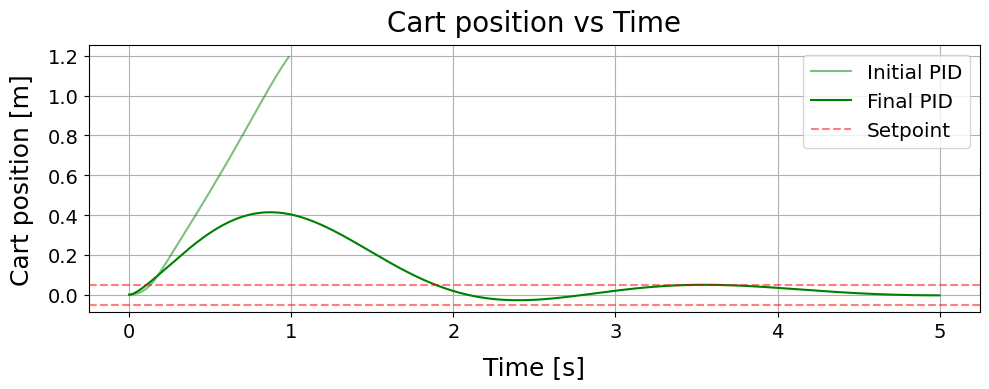

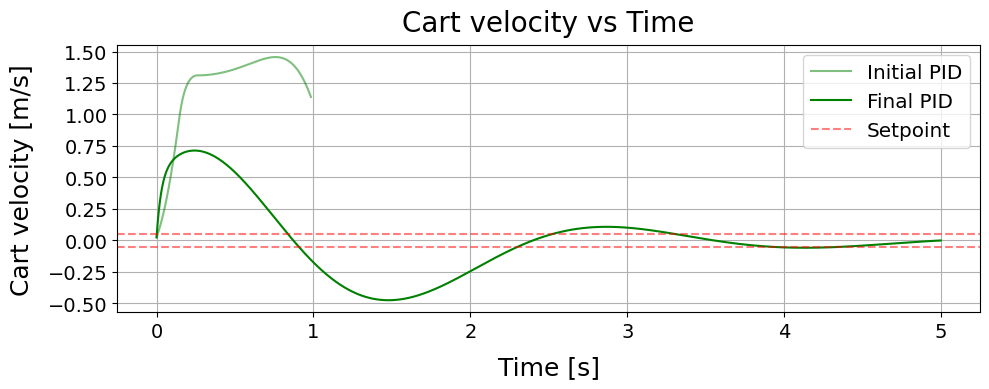

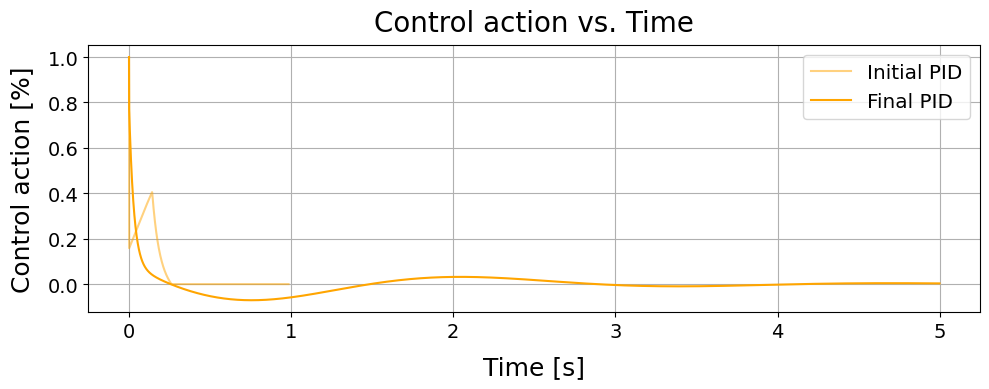

In [74]:
plot_cartPole(hist, hist0, pid_angle_cfg['setpoint'], goal_treshold, fig_save_name='Double PID tuning - cartPole', plot_PID0=True)